# Dataset Data Analytics Notebook

After cleaning and combining datasets, it is now time to perform some analytics to be able to extract some
insights and use them to make a machine learning model to predict the popularity of mobile phones.

To make the analysis professional, the questions asked will be correlated with the final goal which is predicting the popularity of mobile phones. So the Business understanding questions is as follows:

- What is the percentage of each brand in the dataset ?
- How old is the mobiles in the dataset ?
- What is the average price of mobiles per brand ?
- Which brand is the most popular ?
- What are the top 25 popular mobile phones ?
- What is the Operating System of mobile phones in dataset ?
- What is the supported networks in the dataset mobile phones ?
- How many of the mobile phones support dual sim ?
- Is the mobile rating correlated to the mobile features and its price ?

## 1. Import libraries and load data from database

In [1]:
# import libraries
from sqlalchemy import create_engine 
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data from database
engine = create_engine('sqlite:///Mobile_DB.db')
df = pd.read_sql_table('Mobiles_Features_Reviews', engine)
df.head()

,brand,mob_name,price,launch_year,GSM,CDMA,HSPA,EVDO,LTE,body_height(mm),...,screen_to_body(%),Android_OS,iOS_OS,Windows_OS,RAM_size(GB),selfie_cam(MP),main_cam(MP),battery(mAh),total_reviews,rating
0,Acer,Liquid Jade Z,129.99,2015.0,1,0,1,0,1,143.5,...,68.8,1,0,0,1.0,5.0,13.0,2300.0,4,1.50
1,Acer,Liquid M2,34.95,2015.0,1,0,1,0,0,124.9,...,57.0,0,0,1,1.0,2.0,5.0,1300.0,15,3.20
2,Apple,iPad 2,129.60,2011.0,0,1,0,1,0,241.2,...,65.1,0,1,0,NaN,NaN,7.0,6930.0,5,3.20
3,Apple,iPad Air,379.99,2019.0,1,0,1,0,1,250.6,...,78.3,0,1,0,3.0,7.0,8.0,NaN,16,3.95
4,Apple,iPad Air 2,211.39,2014.0,1,1,1,1,1,240.0,...,71.6,0,1,0,2.0,2.0,8.0,7340.0,124,4.20


In [3]:
# see df columns
df.columns

Index(['brand', 'mob_name', 'price', 'launch_year', 'GSM', 'CDMA', 'HSPA',
       'EVDO', 'LTE', 'body_height(mm)', 'body_width(mm)', 'body_depth(mm)',
       'body_weight(g)', 'dual_sim', 'screen_to_body(%)', 'Android_OS',
       'iOS_OS', 'Windows_OS', 'RAM_size(GB)', 'selfie_cam(MP)',
       'main_cam(MP)', 'battery(mAh)', 'total_reviews', 'rating'],
      dtype='object')

### Q1: What is the percentage of each brand in the dataset ?

In [4]:
def draw_pie_chart(pd_series):
    
    '''
    INPUT
    pd_series - a pandas series extracted from main df
    
    This function draws a pie chart from a given column and shows it in notebook
    '''
    # Make the pie chart circular
    plt.axis('equal');
    # Plot the given series data with its index as labels
    plt.pie(pd_series, labels=pd_series.index)
    # draw and show it in figure
    fig = plt.gcf()
    fig.set_size_inches(12,12)
    plt.show()

In [5]:
# Create a series with the percentage of each brand in df
brands_perc = df['brand'].value_counts(normalize=True) * 100
brands_perc

Samsung          16.060606
BLU              11.969697
Motorola         10.757576
HTC               9.696970
Sony              7.878788
Nokia             7.272727
LG                6.666667
Apple             3.636364
Xiaomi            3.484848
BlackBerry        3.333333
Huawei            2.727273
ZTE               1.818182
Pantech           1.818182
Plum              1.666667
Sony Ericsson     1.363636
Lenovo            1.363636
Google            1.363636
alcatel           1.060606
Microsoft         0.757576
Palm              0.757576
Asus              0.757576
Posh              0.606061
Unnecto           0.606061
Yezz              0.454545
Meizu             0.303030
verykool          0.303030
Acer              0.303030
T-Mobile          0.151515
Yota              0.151515
Infinix           0.151515
Casio             0.151515
HP                0.151515
Maxwest           0.151515
Cat               0.151515
Dell              0.151515
Name: brand, dtype: float64

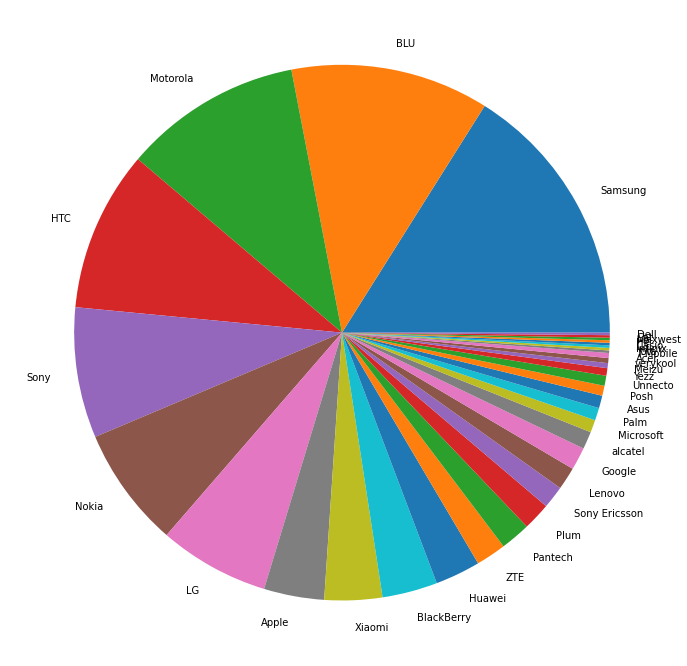

In [6]:
# Draw brand distribution percentages
draw_pie_chart(brands_perc)

The above figure can clarify the answer of the first question showing the percentage of each brand and that Samsung is the most existing brand in the dataframe.

## How old is the mobiles in the dataset ?

In [7]:
def plot_bar_with_avg(pd_series,avg_label,title):
    
    '''
    INPUTs
    pd_series - pandas series of one column of the main df
    avg_label - label to write for the average on the chart
    title - title of the chart
    
    This function follows the following steps to draw a visualizing bar chart with average line:
    1. Creates a figure with the function subplot.
    2. Plots the input series (column) from the given df to bars in the created figure.
    3. Adds a horizontal line showing the average of this column relative to the index (x-axis).
    4. Adds a legend and a label to the average line.
    '''
    x_range = range(len(pd_series.index))
    x_labels = pd_series.index
    fig, ax = plt.subplots(figsize=(15,7))
    plt.bar(x_range,pd_series)
    plt.title(title)
    plt.xticks(x_range, x_labels, rotation='vertical')
    plt.axhline(pd_series.mean(),color='r',label=avg_label)
    ax.legend()
    plt.show()

In [8]:
# Create a series with release years and their counts in dataframe then sort them ascendingly
release_dates = df['launch_year'].value_counts().sort_index()
release_dates

1998.0     1
2003.0     1
2004.0     2
2005.0     6
2006.0     8
2007.0    17
2008.0    19
2009.0    27
2010.0    39
2011.0    53
2012.0    50
2013.0    62
2014.0    92
2015.0    98
2016.0    56
2017.0    31
2018.0    40
2019.0    46
2020.0     6
Name: launch_year, dtype: int64

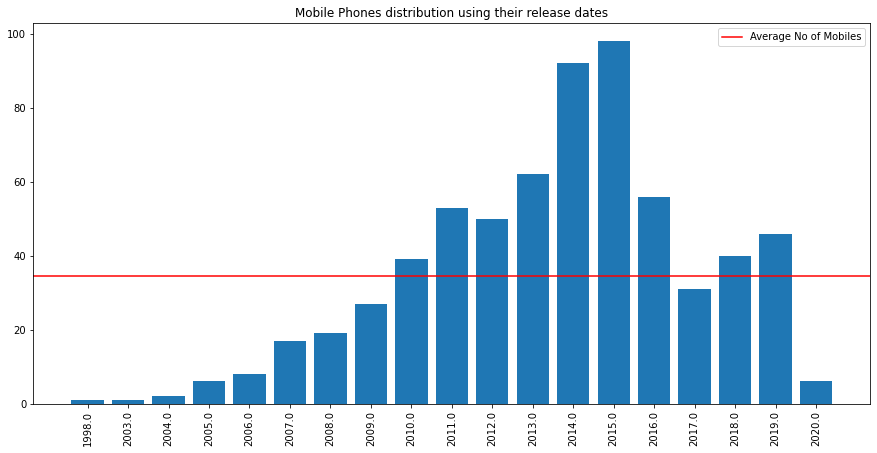

In [9]:
# Plot the counts of mobile phones per release year in dataframe with the average no. of mobile phones per year
plot_bar_with_avg(release_dates,'Average No of Mobiles','Mobile Phones distribution using their release dates')

So replying to Q2, most of the mobile phones in the dataframe are released in the years between 2013 and 2016. However, there is other mobile phones that are older and newer as shown in the above graph.

## Q3: What is the average price of mobiles per brand ?

In [10]:
# Get average price per brand and add it to a pd series
mobiles_prices_avg = df[['brand','price']].groupby('brand').mean().reset_index()
prices_series = pd.Series(np.array(mobiles_prices_avg['price']), index =mobiles_prices_avg['brand'])
prices_series

brand
Acer              82.470000
Apple            514.831667
Asus             237.765000
BLU              266.460256
BlackBerry       226.063636
Casio             73.970000
Cat              129.950000
Dell              12.440000
Google           587.325556
HP                79.990000
HTC              223.441270
Huawei           397.274444
Infinix          239.980000
LG               243.610000
Lenovo           959.398889
Maxwest           55.990000
Meizu            263.495000
Microsoft        193.186000
Motorola         241.153571
Nokia            222.875319
Palm             178.196000
Pantech           95.470833
Plum              70.549091
Posh             102.992500
Samsung          434.878725
Sony             383.152800
Sony Ericsson    158.932222
T-Mobile          66.550000
Unnecto           78.297500
Xiaomi           234.348182
Yezz              94.810000
Yota             159.450000
ZTE              179.258333
alcatel          161.720000
verykool          68.560000
dtype: float64

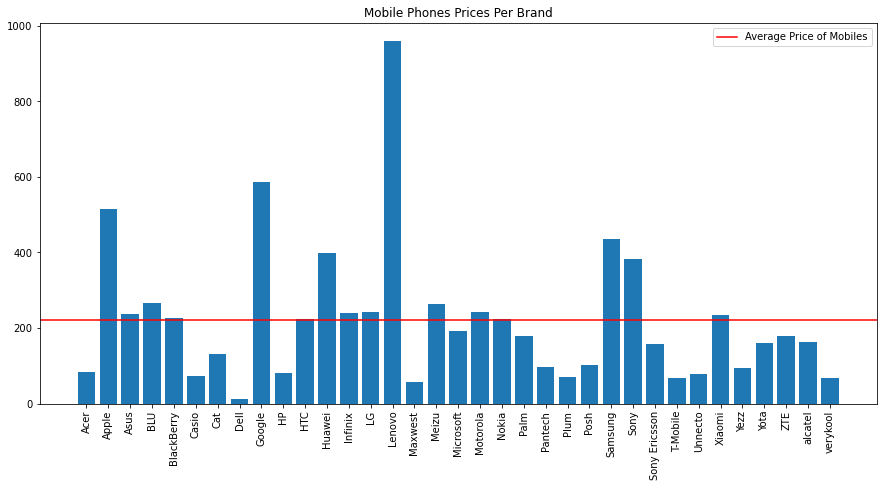

In [11]:
# Show average prices with the average mobile price in df
plot_bar_with_avg(prices_series,'Average Price of Mobiles','Mobile Phones Prices Per Brand')

From the df information about the prices, it seems that Lenovo has the highest prices followed by Google and Apple. Let us try to correlate the information we collected about the mobile phones so far with their popularity.

## Which brand is the most popular ?

In [12]:
mobiles_prices_avg = df[['brand','rating']].groupby('brand').mean().reset_index()
popularity_series = pd.Series(np.array(mobiles_prices_avg['rating']), index =mobiles_prices_avg['brand'])
popularity_series

brand
Acer             2.350000
Apple            3.914084
Asus             4.025926
BLU              3.717191
BlackBerry       3.597484
Casio            3.625000
Cat              4.142857
Dell             3.073529
Google           3.904378
HP               3.641791
HTC              3.530166
Huawei           4.125217
Infinix          2.267857
LG               3.601975
Lenovo           3.214655
Maxwest          2.538462
Meizu            3.666667
Microsoft        3.962013
Motorola         3.579731
Nokia            3.742655
Palm             3.365833
Pantech          3.540278
Plum             3.132290
Posh             3.567568
Samsung          3.752067
Sony             3.818957
Sony Ericsson    4.076415
T-Mobile         3.540541
Unnecto          3.699405
Xiaomi           4.379553
Yezz             2.700000
Yota             3.916667
ZTE              3.654463
alcatel          3.817999
verykool         3.200000
dtype: float64

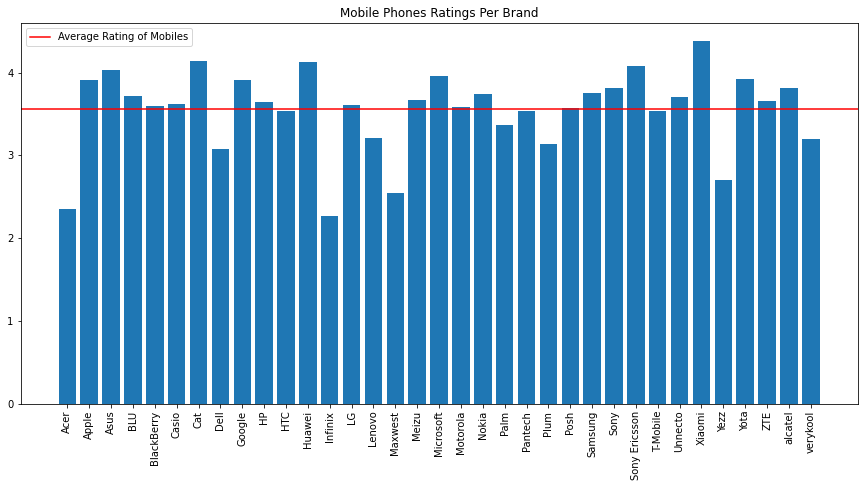

In [13]:
plot_bar_with_avg(popularity_series,'Average Rating of Mobiles','Mobile Phones Ratings Per Brand')

In [14]:
popularity_series.idxmax()

'Xiaomi'

In [15]:
popularity_series.sort_values(ascending=False)

brand
Xiaomi           4.379553
Cat              4.142857
Huawei           4.125217
Sony Ericsson    4.076415
Asus             4.025926
Microsoft        3.962013
Yota             3.916667
Apple            3.914084
Google           3.904378
Sony             3.818957
alcatel          3.817999
Samsung          3.752067
Nokia            3.742655
BLU              3.717191
Unnecto          3.699405
Meizu            3.666667
ZTE              3.654463
HP               3.641791
Casio            3.625000
LG               3.601975
BlackBerry       3.597484
Motorola         3.579731
Posh             3.567568
T-Mobile         3.540541
Pantech          3.540278
HTC              3.530166
Palm             3.365833
Lenovo           3.214655
verykool         3.200000
Plum             3.132290
Dell             3.073529
Yezz             2.700000
Maxwest          2.538462
Acer             2.350000
Infinix          2.267857
dtype: float64

## What are the top 25 popular mobile phones ?

In [16]:
top_20_popular_mobiles = df[['brand','mob_name','total_reviews','rating']].sort_values('rating',ascending=False).reset_index(drop=True)
top_20_popular_mobiles.head(25)

,brand,mob_name,total_reviews,rating
0,BLU,Grand 5.5 HD,4,5.000000
1,Meizu,MX4 Pro,3,5.000000
2,Nokia,N72,3,5.000000
3,Apple,iPad mini 4,10,5.000000
4,Xiaomi,Mi Note,3,5.000000
5,Sony Ericsson,Xperia ray,3,5.000000
6,HTC,One ME,8,5.000000
7,Nokia,Lumia 525,8,4.875000
8,Samsung,S73,6,4.833333
9,Huawei,P9 Plus,45,4.822222


## What is the Operating System of mobile phones in dataset ?

In [17]:
def create_array_from_categorial_variables(cols):
    values = []
    labels = []
    for col in cols:
        labels.append(col)
        col_values = df[col].value_counts().sort_index()
        values.append(col_values.at[1])
    return values , labels

In [18]:
os_dist, os_lbls = create_array_from_categorial_variables(['Android_OS','iOS_OS','Windows_OS'])
os_series = pd.Series(os_dist, index=os_lbls)
os_series

Android_OS    460
iOS_OS         24
Windows_OS     47
dtype: int64

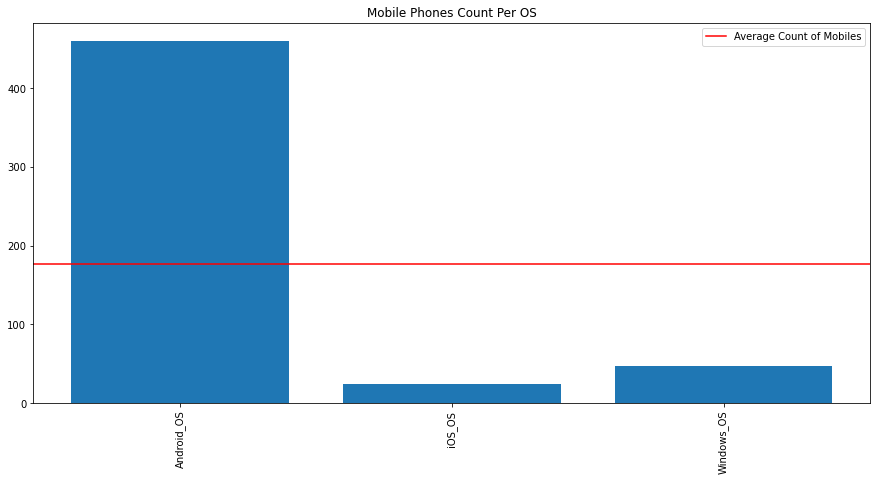

In [19]:
plot_bar_with_avg(os_series,'Average Count of Mobiles','Mobile Phones Count Per OS')

## What is the supported networks in the dataset mobile phones ?

In [20]:
net_dist, net_lbls = create_array_from_categorial_variables(['GSM','CDMA','HSPA','EVDO','LTE'])
net_series = pd.Series(net_dist, index=net_lbls)
net_series

GSM     625
CDMA    133
HSPA    561
EVDO    104
LTE     335
dtype: int64

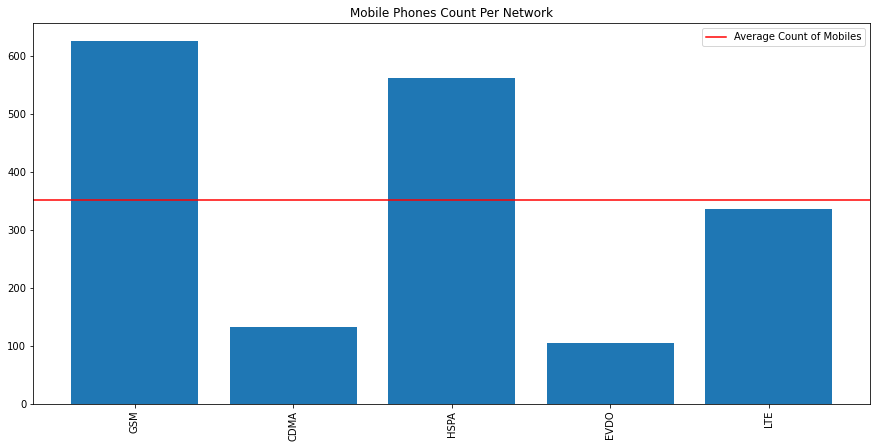

In [21]:
plot_bar_with_avg(net_series,'Average Count of Mobiles','Mobile Phones Count Per Network')

## How many of the mobile phones support dual sim ?

In [22]:
dual_series = df['dual_sim'].value_counts().sort_index()
dual_series

0    389
1    271
Name: dual_sim, dtype: int64

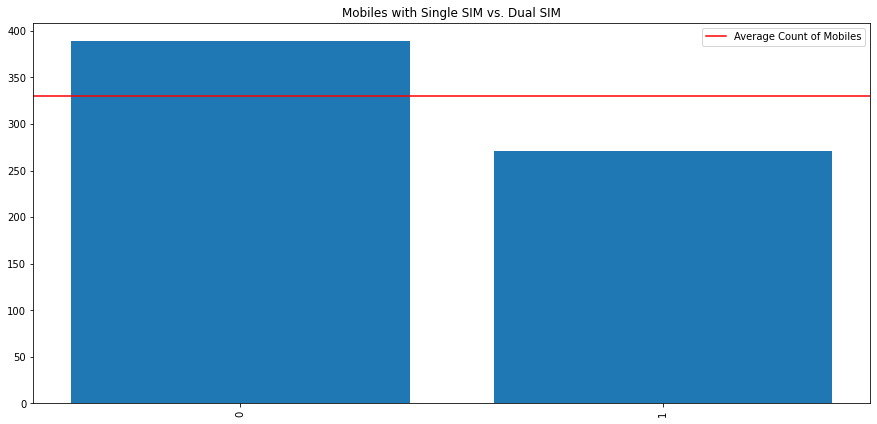

In [23]:
plot_bar_with_avg(dual_series,'Average Count of Mobiles','Mobiles with Single SIM vs. Dual SIM')

## Is the mobile rating correlated to the mobile feautures and its price ?

To be able to answer this question, we need to create our ML Model and study the correlations between our features and the ratings. Consequently, we will discover how strong the relation is to each of the df columns (features) and how these columns can help us know the popularity of mobile phones.

This will take us to the ML Model Notebook to proceed in creating our model